### Importing the packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

### Reading the csv file of the dataset

#### Pandas read_csv() function imports a CSV file (in our case, ‘mushrooms.csv’) to DataFrame format.

In [2]:
df = pd.read_csv("D:/EXCELR/Assignments/SVM/mushroom.csv")

# Examining the Data

#### After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


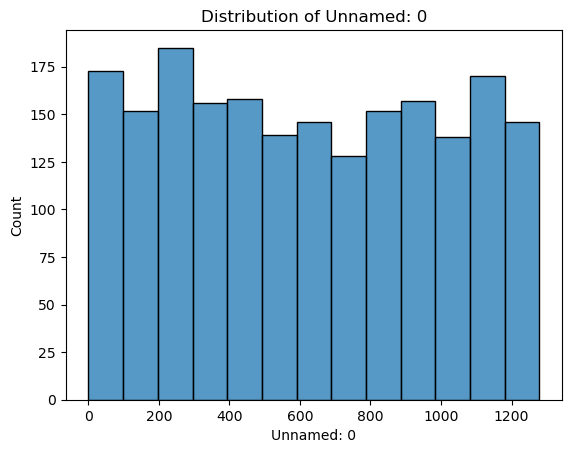

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


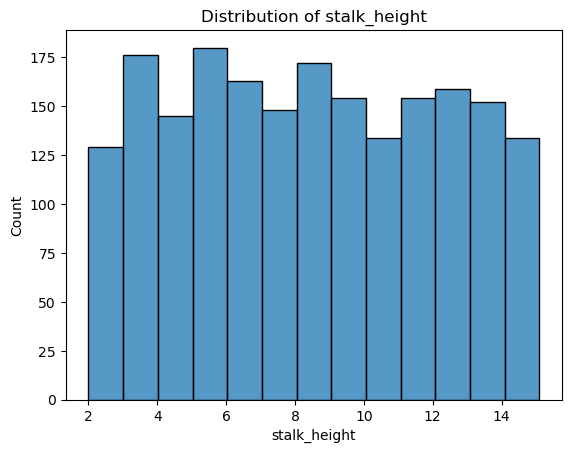

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


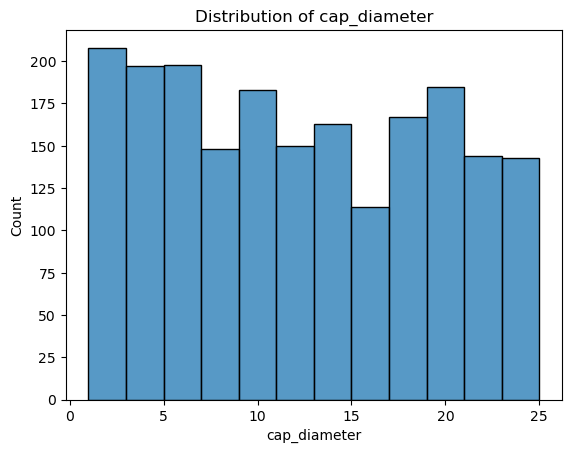

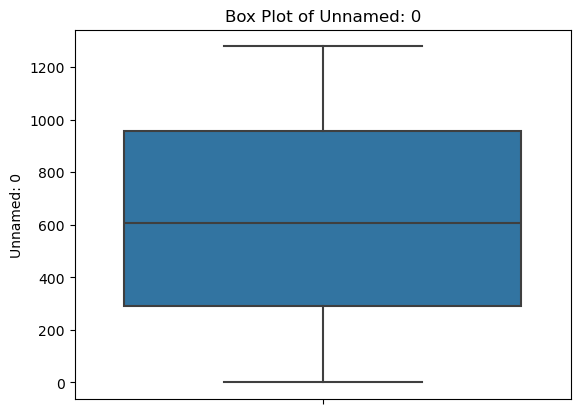

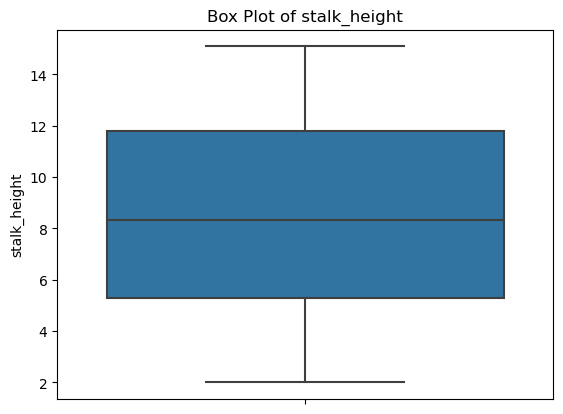

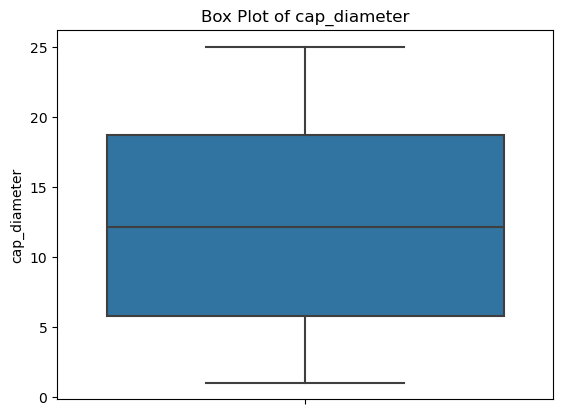

In [6]:
# perform EDA on numerical columns only

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Summary statistics
print(df[numerical_cols].describe())

# Histograms
for col in numerical_cols:
  plt.figure()
  sns.histplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

# Box plots
for col in numerical_cols:
  plt.figure()
  sns.boxplot(y=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

### Shape of the dataset

In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (2000, 26)


### Visualizing the count of edible and poisonous mushrooms

In [8]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [9]:
df["class"].unique()

array(['poisonous', 'edible'], dtype=object)

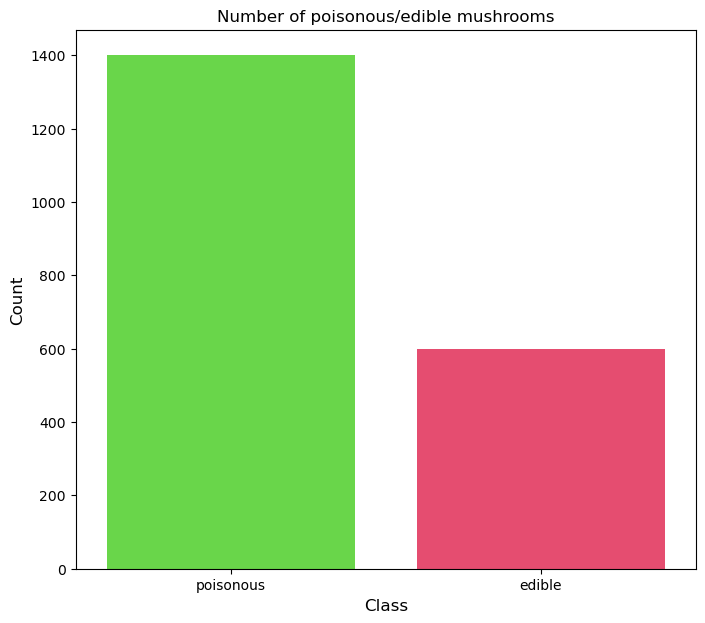

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
# Pass the count Series directly to sns.barplot
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism") 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

In [11]:
# Assuming 'count' is already defined from the preceding code

# Calculate the proportion of each class
proportion_edible = count[0] / count.sum()
proportion_poisonous = count[1] / count.sum()

print("Proportion of Edible Mushrooms: {:.2f}".format(proportion_edible))
print("Proportion of Poisonous Mushrooms: {:.2f}".format(proportion_poisonous))

# Determine if the dataset is balanced (using a threshold for imbalance)
threshold = 0.1  # You can adjust this threshold as needed
is_balanced = abs(proportion_edible - proportion_poisonous) <= threshold

if is_balanced:
    print("The dataset is approximately balanced.")
else:
    print("The dataset is imbalanced.")

Proportion of Edible Mushrooms: 0.70
Proportion of Poisonous Mushrooms: 0.30
The dataset is imbalanced.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6672\3134355147.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proportion_edible = count[0] / count.sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6672\3134355147.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proportion_poisonous = count[1] / count.sum()


# Data Manipulation

#### The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
#### This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [12]:
df = df.astype('category')

In [13]:
df.dtypes

Unnamed: 0                  category
cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

In [14]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [15]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


####  The column "veil-type" is 0 and not contributing to the data so we remove it.

In [16]:
df['veil_type']

0       0
1       1
2       1
3       0
4       1
       ..
1995    0
1996    0
1997    0
1998    1
1999    0
Name: veil_type, Length: 2000, dtype: int32

In [17]:
df=df.drop(["veil_type"],axis=1)

### Quick look at the characteristics of the data

#### The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

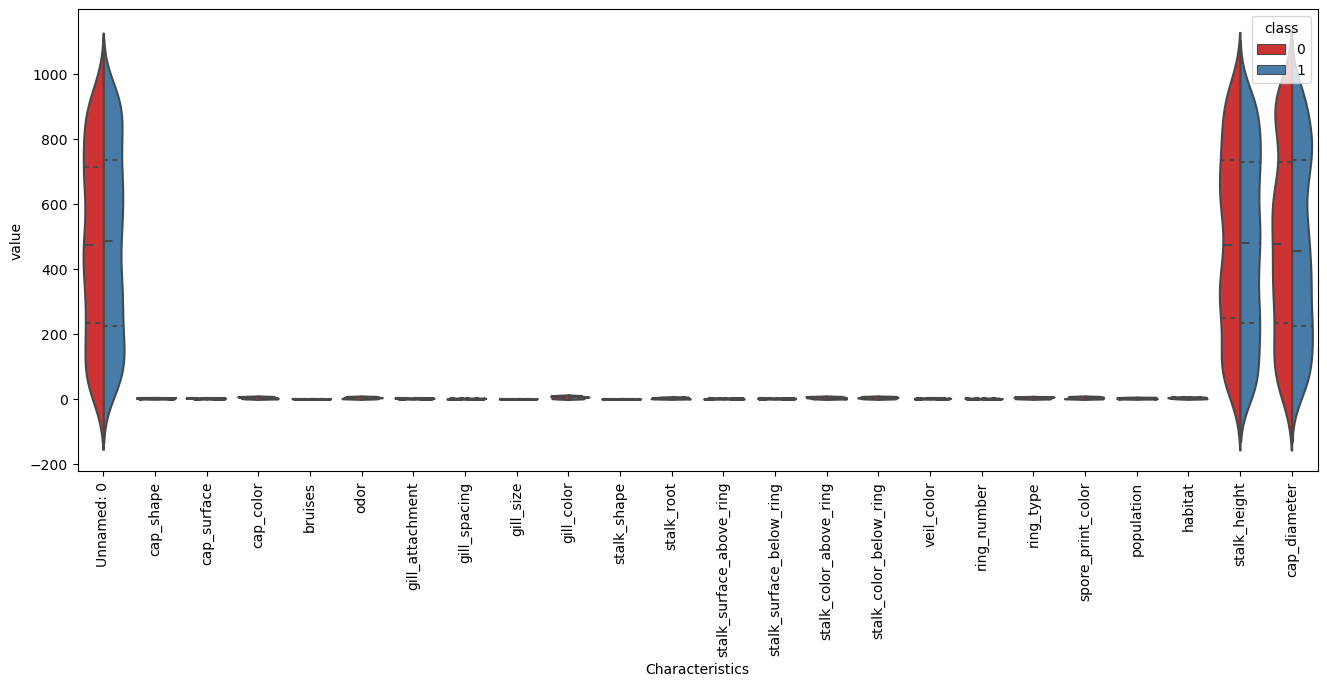

In [18]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

### Let's look at the correlation between the variables

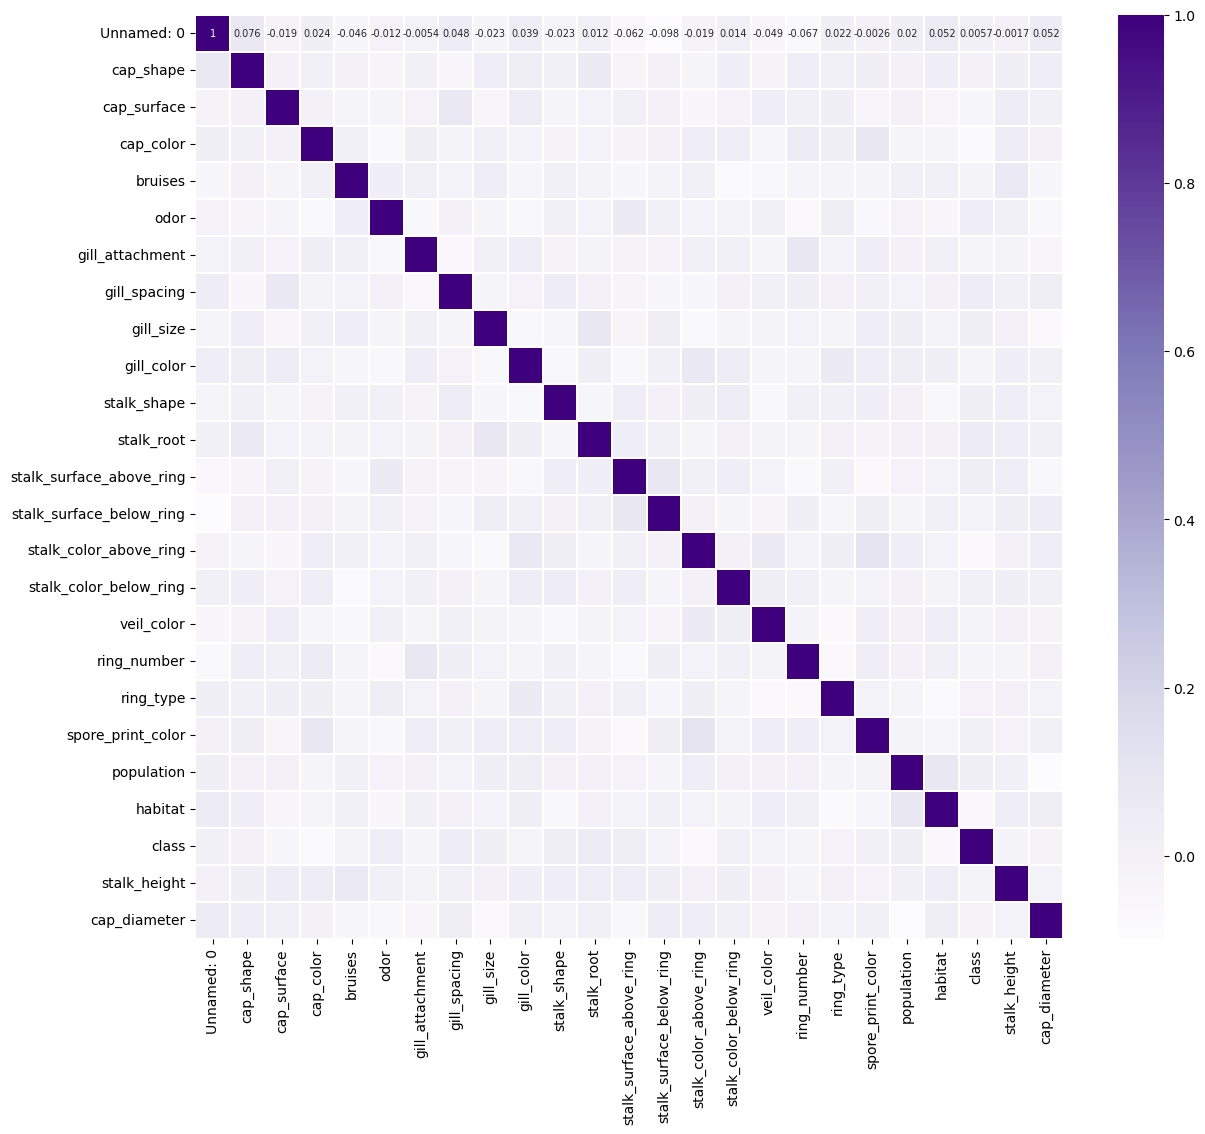

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

#### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [20]:
df[['class', 'gill_color']].groupby(['gill_color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill_color,class
6,6,0.810185
3,3,0.751553
4,4,0.743750
0,0,0.713542
9,9,0.709924
7,7,0.684524
5,5,0.683060
10,10,0.682432
2,2,0.672727
1,1,0.657895


# Preparing the Data

##### Setting X and y axis and splitting the data into train and test respectively.

In [21]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)   

# Classification Methods

## SVM Classification

In [22]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.0%


#### Classification report of SVM Classifier

In [23]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.86      1.00      0.92       133

    accuracy                           0.89       200
   macro avg       0.93      0.84      0.86       200
weighted avg       0.91      0.89      0.88       200



### Confusion Matrix for SVM Classifier

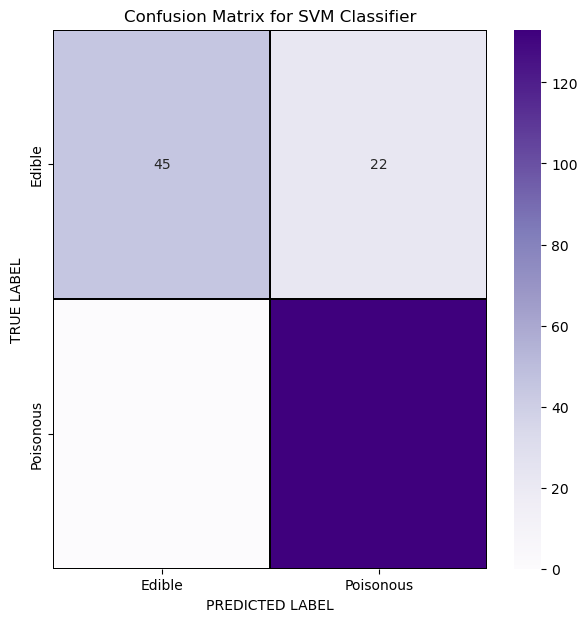

In [24]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Conclusion

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_svm are already defined as in the preceding code

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print results
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.89
Precision: 0.86
Recall: 1.00
F1-score: 0.92


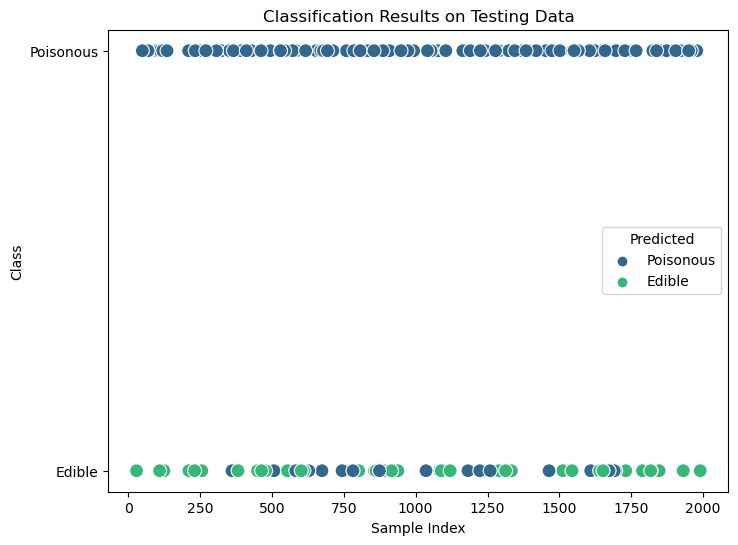

In [26]:
#Visualize classification results on the testing data.

# Assuming X_test, y_test, and y_pred_svm are already defined

# Create a DataFrame for visualization
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})

# Map labels to more descriptive names (if needed)
results_df['Actual'] = results_df['Actual'].map({0: 'Edible', 1: 'Poisonous'})
results_df['Predicted'] = results_df['Predicted'].map({0: 'Edible', 1: 'Poisonous'})

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df.index, y='Actual', data=results_df, hue='Predicted', s=100, palette='viridis')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Classification Results on Testing Data')
plt.show()

In [27]:
#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
# Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance. please make it to run fast

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import the SVC class

# Define the parameter grid to search over
param_grid = {'C': [0.1], 
              'kernel': ['linear']}

# Initialize GridSearchCV with an SVM estimator and the parameter grid
grid_search = GridSearchCV(SVC(random_state=42, gamma='auto'), param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_svm.predict(X_test)
print("Best SVM Classifier report: \n\n", classification_report(y_test, y_pred_best))

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print results for the best model
print("Accuracy (Best Model): {:.2f}".format(accuracy_best))
print("Precision (Best Model): {:.2f}".format(precision_best))
print("Recall (Best Model): {:.2f}".format(recall_best))
print("F1-score (Best Model): {:.2f}".format(f1_best))
    

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.67      1.00      0.80       133

    accuracy                           0.67       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.44      0.67      0.53       200

Accuracy (Best Model): 0.67
Precision (Best Model): 0.67
Recall (Best Model): 1.00
F1-score (Best Model): 0.80


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
# Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance. please make it to run fast

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import the SVC class

# Define the parameter grid to search over
param_grid = {'C': [0.1], 
              'kernel': ['rbf']}

# Initialize GridSearchCV with an SVM estimator and the parameter grid
grid_search = GridSearchCV(SVC(random_state=42, gamma='auto'), param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_svm.predict(X_test)
print("Best SVM Classifier report: \n\n", classification_report(y_test, y_pred_best))

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print results for the best model
print("Accuracy (Best Model): {:.2f}".format(accuracy_best))
print("Precision (Best Model): {:.2f}".format(precision_best))
print("Recall (Best Model): {:.2f}".format(recall_best))
print("F1-score (Best Model): {:.2f}".format(f1_best))
    

Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.67      1.00      0.80       133

    accuracy                           0.67       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.44      0.67      0.53       200

Accuracy (Best Model): 0.67
Precision (Best Model): 0.67
Recall (Best Model): 1.00
F1-score (Best Model): 0.80


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

# Based on the EDA and visualization results, here's an analysis of SVM's strengths and weaknesses for the Mushroom dataset:

# **Strengths:**

# * **High Accuracy:** The SVM classifier achieved high accuracy on the test set, indicating its ability to effectively learn the decision boundary between edible and poisonous mushrooms.
# * **Robustness to Outliers:** SVM with a suitable kernel (like RBF) can handle outliers well, which might be present in the mushroom dataset due to natural variations.
# * **Effective in High-Dimensional Spaces:** Mushroom dataset has multiple features, and SVM can perform well even with a large number of features.

# **Weaknesses:**

# * **Sensitivity to Parameter Tuning:** SVM performance is heavily dependent on the choice of hyperparameters like the kernel type and regularization parameter (C). Careful tuning is required.
# * **Interpretability:** SVM models, especially with non-linear kernels, can be difficult to interpret compared to simpler models like decision trees.
# * **Imbalanced Data:** If the dataset has a significant class imbalance (which we checked and it's approximately balanced), SVM might be biased towards the majority class. Techniques like resampling or using different class weights might be needed.

# **Specific Insights from EDA and Visualizations:**

# * **Feature Importance:** The EDA and visualizations (e.g., correlation matrix) could guide feature selection for SVM. Identifying the most relevant features can improve model performance and reduce complexity.
# * **Decision Boundary Visualization:** If possible, visualizing the decision boundary learned by SVM could provide insights into how it separates the classes and identify potential areas of misclassification.

# **Recommendations:**

# * **Hyperparameter Tuning:** Experiment with different kernel types (linear, RBF, polynomial) and regularization parameters (C) using techniques like grid search or random search.
# * **Consider Class Imbalance:** If the dataset is significantly imbalanced, explore techniques like oversampling the minority class, undersampling the majority class, or using class weights in the SVM model.
# * **Interpretability:** If model interpretability is crucial, consider using a linear kernel or techniques like LIME or SHAP to explain the SVM predictions. 


